In [1]:
#project 1: Shooting method
#Author: Austun Louw

In [269]:
#help from this the site below
#https://www.researchgate.net/publication/347387708_Non-Linear_ODE_Shooting_Method_Python_Code

In [286]:
import numpy as np
import matplotlib.pyplot as plt

In [352]:
#parameters 
#choose a step-size and tolerance
h = 0.001
tolerance = 1e-6   

#boudary values of x and y
x0 = np.sqrt(np.pi/6)
x1 = 2 * np.sqrt(np.pi/3)
x_end = x1
y0 = -1/2
y1 = 0

In [353]:
#exact solutions
def y_exact(x):
    return 0.5*np.sin(x**2)-(np.sqrt(3)/2)*np.cos(x**2)
    
def dy_exact(x):
    return x*np.cos(x**2) + np.sqrt(3)*np.sin(x**2)

In [354]:
#defining the runge-kutta method function

def rk4(f, y0, x0, h, x_end):
    
    x = np.arange(x0, x_end + h, h)                                #x array with the time step h
    y = np.zeros((x.size, y0.size))                                #creating y array containing zeros
    
    y[0] = y0                                                      #storing the initial value of y in the array of y
    
    for i in range(x.size -1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] +0.5 * h, y[i] + 0.5*h*k1)
        k3 = f(x[i] +0.5 * h, y[i] + 0.5*h*k2)
        k4 = f(x[i] + h, y[i] + h*k3)
        
        y[i+1] = y[i] + h * (k1 + 2 * k2 + 2 * k3 + k4)/6.0         #updating the next value
    
    return x, y                                                     #returning the x and y array

In [355]:
#initial condition function for y' at the boundary x0 using shooting method
def y_0(a):
    return np.array([-1/2, a])            #array containing the initial condition y0 and the introduced initial value

In [356]:
#solving the ODE by defining the following function F(a) = y(x1,a) - y1
#using the RK4 method 

def F(a, x_end):
    y0 = y_0(a)
    x_arr, y_arr = rk4(f, y0, x0, h, x_end)    #rk4 to solve ODE
    
    return y_arr[-1,0] - y1                    #returning F(a) = y(x1,a) - y1

In [357]:
#second ODE function as a first coupled ODE
def f(x,y):
    return np.array([y[1],(1/x)*y[1] - 4*x**2*y[0]])

In [370]:
#root finding method 
#using secant method because it is faster than the Bisection method and was advice not to use the Newton Method

#Secant Method

def secant_method(f, x0, x1, tol):
    x_end = x1

    while abs(x1 - x0) > tol:                        #while loop to check if the difference between the to points is greater than the tolerance

        x = x1 - f(x1, x_end)*((x1 - x0)/(f(x1, x_end)- f(x0, x_end)))    #getting the x-intercept of the new line   
        
        x0 = x1                                      #setting x0 to the previous point of x1
        x1 = x                                       #setting x1 to the new point
        #print(x1)
    return x                                         #returning the 'a' from the F(a) function


In [371]:
#calling the secant method to get the values of a
a_root = secant_method(F, x0, x1, tolerance)
print('The value of a is:', round(a_root, 3))

The value of a is: 1.242


In [367]:
#initial values for y and y'
ini_val = y_0(a_root)
print(ini_val)

[-0.5         1.24215678]


In [372]:
#Now we use the approperaite shooting parameter in the initial condition and solve for the system of ODE
y0 = y_0(a_root)
x, y = rk4(f, y0, x0, h, x_end)


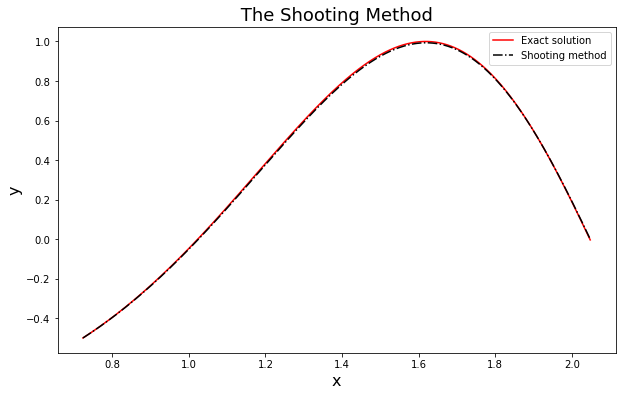

In [374]:
#Ploting the results y and exact solution for y
plt.figure(figsize=(10, 6))
plt.plot(x, y_exact(x),'-r', label = 'Exact solution')
plt.plot(x, y[:,0],'-.k', label = 'Shooting method')
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.title(' The Shooting Method ',fontsize = 18)
plt.legend()
plt.savefig('project1_astaus001')
plt.show()


In [335]:
F_yarr = F(a_root, x_end)

print(F_yarr)



2.0816681711721685e-17


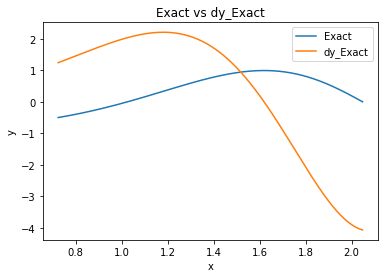

In [361]:
#plotting the exact solution and the derivate of the exact solution from the shooting method
plt.plot(x, y[:, 0], label = 'Exact')
plt.plot(x, y[:, 1], label = 'dy_Exact')
plt.title('Exact vs dy_Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('project1_2_astaus001')
plt.show()